In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import cluster
from collections import Counter

# Read csv file into a pandas dataframe
data = pd.read_csv('ardd_fatalities_jan2022.csv',header=None)

# Print the first five rows of data
data.head()

C:\Users\Plath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Plath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Plath\AppData\Local\Temp\ipykernel_17504\237199829.py:13: DtypeWarning: Columns (0,2,3,10,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ardd_fatalities_jan2022.csv',header=None)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20225010,WA,1,2022,Sunday,2:50,Single,No,No,No,...,20,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
2,20224003,SA,1,2022,Friday,21:10,Single,No,No,No,...,21,Remote Australia,South Australia - Outback,Lower Eyre Peninsula (DC),Local Road,No,No,17_to_25,Weekend,Night
3,20223017,Qld,1,2022,Sunday,18:00,Single,No,No,No,...,26,Inner Regional Australia,Ipswich,Somerset (R),Sub-arterial Road,No,No,26_to_39,Weekend,Night
4,20223013,Qld,1,2022,Friday,18:00,Single,No,No,No,...,22,Inner Regional Australia,Wide Bay,Fraser Coast (R),Local Road,No,No,17_to_25,Weekend,Night


In [2]:
data2 = data.copy()

In [3]:

data2.columns = ['Crash_ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash_Type', 'Bus_Involvement', 'Heavy_Rigid_Truck_Involvement', 
'Articulated_Truck_Involvement', 'Speed_limit', 'Road_User', 'Gender', 'Age', 'National_Remoteness_Areas', 'SA4_Name_2016', 
                 'National_LGA_Name_2017', 'National_Road_Type', 'Christmas_Period', 'Easter_Period', 'Age_Group', 'Day_Of_Week', 'Time_of_Day']
data2.drop(index=data2.index[0], axis=0, inplace=True) # remove first row of data

In [4]:
print('Number of missing values:')
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

Number of missing values:
	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 45872
	SA4_Name_2016: 45858
	National_LGA_Name_2017: 45854
	National_Road_Type: 45873
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [5]:
data2 = data2.replace(np.NaN, "?")
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 0
	SA4_Name_2016: 0
	National_LGA_Name_2017: 0
	National_Road_Type: 0
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [6]:
data2['Crash_ID'] = pd.to_numeric(data2['Crash_ID'], errors='coerce')
data2['Month'] = pd.to_numeric(data2['Month'], errors='coerce')
data2['Year'] = pd.to_numeric(data2['Year'], errors='coerce')
data2['Speed_limit'] = pd.to_numeric(data2['Speed_limit'], errors='coerce')
data2['Age'] = pd.to_numeric(data2['Age'], errors='coerce')

In [7]:
numeric_attributes = data2.columns[data2.dtypes != "object"]
categorical_attributes = data2.columns[data2.dtypes == "object"]

print(numeric_attributes)
print(categorical_attributes)

Index(['Crash_ID', 'Month', 'Year', 'Speed_limit', 'Age'], dtype='object')
Index(['State', 'Dayweek', 'Time', 'Crash_Type', 'Bus_Involvement',
       'Heavy_Rigid_Truck_Involvement', 'Articulated_Truck_Involvement',
       'Road_User', 'Gender', 'National_Remoteness_Areas', 'SA4_Name_2016',
       'National_LGA_Name_2017', 'National_Road_Type', 'Christmas_Period',
       'Easter_Period', 'Age_Group', 'Day_Of_Week', 'Time_of_Day'],
      dtype='object')


In [8]:
modified_data = data2.dropna()

# Print the total number of missing values
print("There are {} missing values in this dataset".format(modified_data.isnull().sum().sum()))

print('Number of instances = %d' % (modified_data.shape[0]))
print('Number of attributes = %d' % (modified_data.shape[1]))

print('Number of missing values:')
for col in modified_data.columns:
    print('\t%s: %d' % (col,modified_data[col].isna().sum()))

There are 0 missing values in this dataset
Number of instances = 53227
Number of attributes = 23
Number of missing values:
	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 0
	SA4_Name_2016: 0
	National_LGA_Name_2017: 0
	National_Road_Type: 0
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [9]:
# # Replace all missing values with user defined constant, Replacing -9 values with null spaces
# print('Before replacing missing values:')
# print(data[8:18])

data3 = data2.copy()

# data3 = data3.replace("-9" ,np.NaN)

# print('\nAfter replacing missing values:')
# print(data3[8:18])

In [10]:
numeric_attributes = data3.columns[data3.dtypes != "object"]
categorical_attributes = data3.columns[data3.dtypes == "object"]

print(numeric_attributes)
print(categorical_attributes)

Index(['Crash_ID', 'Month', 'Year', 'Speed_limit', 'Age'], dtype='object')
Index(['State', 'Dayweek', 'Time', 'Crash_Type', 'Bus_Involvement',
       'Heavy_Rigid_Truck_Involvement', 'Articulated_Truck_Involvement',
       'Road_User', 'Gender', 'National_Remoteness_Areas', 'SA4_Name_2016',
       'National_LGA_Name_2017', 'National_Road_Type', 'Christmas_Period',
       'Easter_Period', 'Age_Group', 'Day_Of_Week', 'Time_of_Day'],
      dtype='object')


In [11]:
# data4 = data3['Speed_limit']

# print('Before replacing missing values:')
# print(data3[9:17])

# data4 = data4.fillna(data4.median())


# print('\nAfter replacing missing values:')
# print(data4[9:17])


In [12]:
# data3 = data2.iloc[:,13:15]

In [13]:
# print('Before replacing missing values:')
# print(data[8:18])

data3 = data3.replace("Very Remote Australia", "1")
data3 = data3.replace("Remote Australia", "2")
data3 = data3.replace("Outer Regional Australia", "3")
data3 = data3.replace("Inner Regional Australia", "4")
data3 = data3.replace("Major Cities of Australia", "5")
data3 = data3.replace("?", np.NaN)


# print('\nAfter replacing missing values:')
# print(data3[8:18])

In [14]:
data4 = data3[['National_Remoteness_Areas', 'Age']]
# data4 = data3[['National_Remoteness_Areas', 'SA4_Name_2016', 'Age']]

data4.dropna()

,National_Remoteness_Areas,Age
2,2,21
3,4,26
4,4,22
5,5,44
6,3,29
...,...,...
9481,3,40
9487,5,46
9496,5,82
9504,2,84


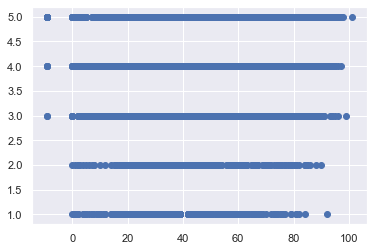

In [15]:
plt.scatter(data4['Age'],data4['National_Remoteness_Areas'])
plt.show()

In [16]:
data3

,Crash_ID,State,Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,...,Age,National_Remoteness_Areas,SA4_Name_2016,National_LGA_Name_2017,National_Road_Type,Christmas_Period,Easter_Period,Age_Group,Day_Of_Week,Time_of_Day
1,20225010,WA,1,2022,Sunday,2:50,Single,No,No,No,...,20,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
2,20224003,SA,1,2022,Friday,21:10,Single,No,No,No,...,21,2,South Australia - Outback,Lower Eyre Peninsula (DC),Local Road,No,No,17_to_25,Weekend,Night
3,20223017,Qld,1,2022,Sunday,18:00,Single,No,No,No,...,26,4,Ipswich,Somerset (R),Sub-arterial Road,No,No,26_to_39,Weekend,Night
4,20223013,Qld,1,2022,Friday,18:00,Single,No,No,No,...,22,4,Wide Bay,Fraser Coast (R),Local Road,No,No,17_to_25,Weekend,Night
5,20223005,Qld,1,2022,Friday,23:00,Single,No,No,No,...,44,5,Brisbane - South,Brisbane (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53228,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,-9,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
53229,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
53230,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
53231,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [17]:
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data3)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

ValueError: could not convert string to float: 'WA'

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np

# X = data3

# range_n_clusters = [2, 3, 4, 5, 6]

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(
#         X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Latitude")
#     ax2.set_ylabel("Longitude")

#     plt.suptitle(
#         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()

In [18]:
# Frequency of collisions for regional areas using Crash ID and National Remoteness Areas

data5 = data3[['National_Remoteness_Areas', 'Crash_ID']]
data5.dropna()


,National_Remoteness_Areas,Crash_ID
2,2,20224003
3,4,20223017
4,4,20223013
5,5,20223005
6,3,20223010
...,...,...
9481,3,20144083
9487,5,20145108
9496,5,20144022
9504,2,20145072


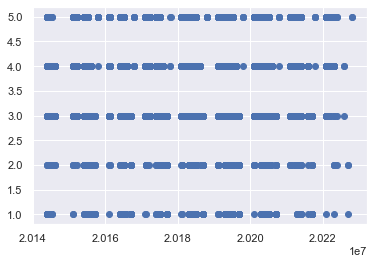

In [19]:
plt.scatter(data5['Crash_ID'],data5['National_Remoteness_Areas'])
plt.show()

In [45]:
data5 = data3.replace(np.NaN, "?")
data5 = data3.replace("?", 6)

In [46]:
data6 = data5.iloc[:, [0,14]]

Text(0, 0.5, 'SSE')

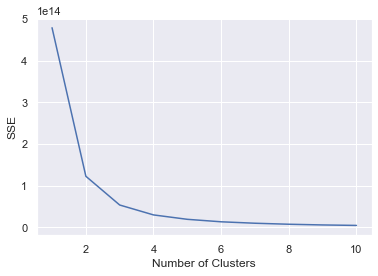

In [47]:


numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data6)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = data6

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette Co-efficient Values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Crash ID")
    ax2.set_ylabel("National Remoteness Area")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()